In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
    
class k_armed_bandit:
    def __init__(self,numOfBandit,mean,variance,epsilon):
        self.reward = []
        self.historyOfReward = []
        self.epsilon = epsilon
        self.qValues = []
        self.numOfAction = []
        self.num = numOfBandit 
        self.rewardMean = mean
        self.rewardVariance = variance
        for i in range(numOfBandit):
            self.reward.append(0)
            self.qValues.append(0)
            self.numOfAction.append(0)
        
    def generateReward(self,action):
    
        self.reward[action] = np.random.normal(self.rewardMean[action],self.rewardVariance[action])
        return self.reward[action]   
     
    def updateQvalues(self,action,reward):
        self.qValues[action] = self.qValues[action]+(1/self.numOfAction[action])*(reward-self.qValues[action])
        
        
    def takeAction(self,epsilon):
        if np.random.rand()<epsilon:
            action = np.argmax(self.qValues)
        else:
            action = np.random.randint(self.num)
            
        return action
    
    def main(self,eps): 
        meanReward = 0
        for i in range(eps):
            action = self.takeAction(self.epsilon)
            self.numOfAction[action] += 1
            print(f'action at level {i} is: {action}')
            reward = self.generateReward(action)
            meanReward += reward
            print(f'total reward {meanReward} ')
            self.historyOfReward.append(meanReward/(i+1))
            self.updateQvalues(action,reward)
            
        

In [19]:
mean = [1,1,10,1,1,1]
variance = [1,1,1,1,1,1]

print(len(mean),len(variance))

env1 = k_armed_bandit(6,mean,variance,1)
env2 = k_armed_bandit(6,mean,variance,0.9)
env3 = k_armed_bandit(6,mean,variance,0.95)
env4 = k_armed_bandit(6,mean,variance,0.98)

env1.main(1500)
env2.main(1500)
env3.main(1500)
env4.main(1500)

6 6
action at level 0 is: 0
total reward 1.7975480405249105 
action at level 1 is: 0
total reward 3.159134820534166 
action at level 2 is: 0
total reward 3.817590657784826 
action at level 3 is: 0
total reward 5.845797182344979 
action at level 4 is: 0
total reward 6.785358968700427 
action at level 5 is: 0
total reward 7.676231251658448 
action at level 6 is: 0
total reward 10.452444812281938 
action at level 7 is: 0
total reward 11.922764054784686 
action at level 8 is: 0
total reward 14.459374680154289 
action at level 9 is: 0
total reward 13.90458293225078 
action at level 10 is: 0
total reward 15.401846234241074 
action at level 11 is: 0
total reward 16.258443815141842 
action at level 12 is: 0
total reward 16.766787621275324 
action at level 13 is: 0
total reward 18.089572142461147 
action at level 14 is: 0
total reward 18.79849997561584 
action at level 15 is: 0
total reward 18.931686476365908 
action at level 16 is: 0
total reward 19.086307971845596 
action at level 17 is: 0
to

action at level 1149 is: 0
total reward 1190.8365932100257 
action at level 1150 is: 0
total reward 1191.7899867166755 
action at level 1151 is: 0
total reward 1192.9574138052367 
action at level 1152 is: 0
total reward 1194.1084520680533 
action at level 1153 is: 0
total reward 1195.1277191511635 
action at level 1154 is: 0
total reward 1196.3934538996016 
action at level 1155 is: 0
total reward 1197.1170543089802 
action at level 1156 is: 0
total reward 1197.006169515509 
action at level 1157 is: 0
total reward 1198.5584484604017 
action at level 1158 is: 0
total reward 1200.2569067010543 
action at level 1159 is: 0
total reward 1200.1860754486795 
action at level 1160 is: 0
total reward 1201.277121231826 
action at level 1161 is: 0
total reward 1202.346463102058 
action at level 1162 is: 0
total reward 1203.8891410748975 
action at level 1163 is: 0
total reward 1205.7975305514387 
action at level 1164 is: 0
total reward 1205.1630114047186 
action at level 1165 is: 0
total reward 120

action at level 649 is: 2
total reward 5487.18509250899 
action at level 650 is: 2
total reward 5497.378932867884 
action at level 651 is: 2
total reward 5506.113183486991 
action at level 652 is: 2
total reward 5515.341538786602 
action at level 653 is: 2
total reward 5526.05558311426 
action at level 654 is: 2
total reward 5535.7626966639245 
action at level 655 is: 2
total reward 5546.177382672663 
action at level 656 is: 2
total reward 5556.132956849544 
action at level 657 is: 2
total reward 5565.710405989538 
action at level 658 is: 5
total reward 5568.081570317539 
action at level 659 is: 2
total reward 5577.301863973693 
action at level 660 is: 2
total reward 5587.40239295172 
action at level 661 is: 2
total reward 5597.614701643977 
action at level 662 is: 2
total reward 5606.277137702691 
action at level 663 is: 2
total reward 5615.422668677284 
action at level 664 is: 2
total reward 5625.164274948062 
action at level 665 is: 2
total reward 5635.946379489562 
action at level 

action at level 1254 is: 2
total reward 11026.940091861477 
action at level 1255 is: 2
total reward 11036.433669560063 
action at level 1256 is: 2
total reward 11045.714854124364 
action at level 1257 is: 2
total reward 11056.37700561911 
action at level 1258 is: 5
total reward 11056.386245806458 
action at level 1259 is: 2
total reward 11066.59888728435 
action at level 1260 is: 2
total reward 11077.472240953399 
action at level 1261 is: 2
total reward 11086.719444502396 
action at level 1262 is: 2
total reward 11095.679581163455 
action at level 1263 is: 2
total reward 11104.914905539621 
action at level 1264 is: 2
total reward 11115.036468153534 
action at level 1265 is: 2
total reward 11125.367360596998 
action at level 1266 is: 2
total reward 11133.931418628401 
action at level 1267 is: 2
total reward 11144.38147060467 
action at level 1268 is: 2
total reward 11155.94874883124 
action at level 1269 is: 2
total reward 11164.781225058132 
action at level 1270 is: 2
total reward 1117

total reward 2602.1227246379917 
action at level 359 is: 2
total reward 2612.037084046736 
action at level 360 is: 2
total reward 2621.5377621568537 
action at level 361 is: 2
total reward 2631.99341954322 
action at level 362 is: 2
total reward 2642.1790111067094 
action at level 363 is: 2
total reward 2650.6990443418167 
action at level 364 is: 2
total reward 2661.201644392084 
action at level 365 is: 2
total reward 2670.2227374801623 
action at level 366 is: 2
total reward 2679.5103685230492 
action at level 367 is: 2
total reward 2689.620992305808 
action at level 368 is: 2
total reward 2700.1367120374166 
action at level 369 is: 2
total reward 2710.8065662422086 
action at level 370 is: 2
total reward 2721.5952048196473 
action at level 371 is: 2
total reward 2731.915238779214 
action at level 372 is: 2
total reward 2741.958288233171 
action at level 373 is: 2
total reward 2751.8729701393736 
action at level 374 is: 2
total reward 2762.236589227005 
action at level 375 is: 2
total

action at level 1190 is: 2
total reward 10683.288322377268 
action at level 1191 is: 2
total reward 10694.581778428272 
action at level 1192 is: 2
total reward 10706.449766574919 
action at level 1193 is: 2
total reward 10716.266988113868 
action at level 1194 is: 2
total reward 10725.04421490962 
action at level 1195 is: 2
total reward 10733.904851327332 
action at level 1196 is: 2
total reward 10746.687046939329 
action at level 1197 is: 2
total reward 10756.803018924424 
action at level 1198 is: 2
total reward 10767.143362280805 
action at level 1199 is: 2
total reward 10776.33118973872 
action at level 1200 is: 2
total reward 10787.346842840745 
action at level 1201 is: 2
total reward 10799.154151145216 
action at level 1202 is: 1
total reward 10799.707236345845 
action at level 1203 is: 2
total reward 10807.305266137913 
action at level 1204 is: 2
total reward 10817.368185082534 
action at level 1205 is: 2
total reward 10829.309341786842 
action at level 1206 is: 2
total reward 10

total reward 2856.4081452280125 
action at level 648 is: 2
total reward 2868.275994030426 
action at level 649 is: 2
total reward 2877.1956100857387 
action at level 650 is: 2
total reward 2886.800445997859 
action at level 651 is: 2
total reward 2895.5382624177983 
action at level 652 is: 2
total reward 2904.3373261416164 
action at level 653 is: 2
total reward 2913.887748469071 
action at level 654 is: 2
total reward 2924.162407528459 
action at level 655 is: 2
total reward 2933.329728147517 
action at level 656 is: 2
total reward 2943.172191475073 
action at level 657 is: 2
total reward 2952.1482543861043 
action at level 658 is: 2
total reward 2962.8879809034133 
action at level 659 is: 2
total reward 2973.026645484795 
action at level 660 is: 2
total reward 2982.594812302952 
action at level 661 is: 2
total reward 2992.7415406343953 
action at level 662 is: 2
total reward 3002.162151289256 
action at level 663 is: 2
total reward 3012.09128062716 
action at level 664 is: 2
total re

action at level 1331 is: 2
total reward 9573.003900218973 
action at level 1332 is: 2
total reward 9582.916247364301 
action at level 1333 is: 2
total reward 9590.684463378702 
action at level 1334 is: 2
total reward 9600.446870324282 
action at level 1335 is: 2
total reward 9610.907725212084 
action at level 1336 is: 2
total reward 9621.13712808706 
action at level 1337 is: 2
total reward 9630.685367906992 
action at level 1338 is: 2
total reward 9640.80730658913 
action at level 1339 is: 2
total reward 9649.960519205442 
action at level 1340 is: 2
total reward 9659.604292875043 
action at level 1341 is: 2
total reward 9670.14752086579 
action at level 1342 is: 2
total reward 9679.952719566763 
action at level 1343 is: 2
total reward 9688.609490862798 
action at level 1344 is: 2
total reward 9699.066073256885 
action at level 1345 is: 2
total reward 9710.520500189368 
action at level 1346 is: 2
total reward 9720.953052429433 
action at level 1347 is: 2
total reward 9730.07229029971 
a

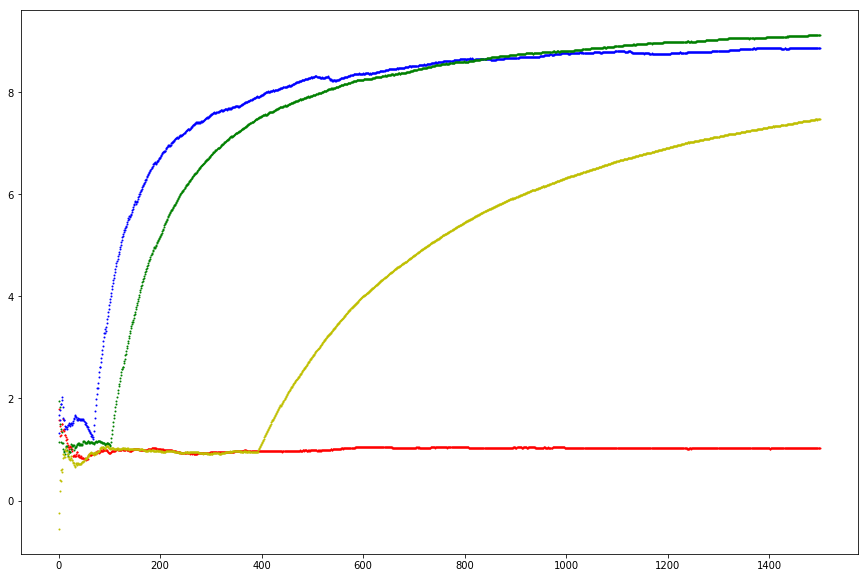

In [20]:
# plt.plot(env.historyOfReward,'ro',markersize=1)
# plt.ylabel('Reward')
# plt.xlabel('episode')
# plt.show()

fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(111)
ax.plot(env1.historyOfReward,'ro',markersize=1)
ax.plot(env2.historyOfReward,'bo',markersize=1)
ax.plot(env3.historyOfReward,'go',markersize=1)
ax.plot(env4.historyOfReward,'yo',markersize=1)